# **Note for "Introduction to brushwood fences for supporting damaged coasts"**

Author: Hoang Tung Dao (Dao Hoang Tung)

# **Introduction**

In the past decade the role of wooden fences, containing brushwood and branches, in efforts to restoring mangroves has been recognized since a vast reduction of mangroves occurred along the Mekong deltaic coast. This study aims to better understand the hydrodynamic performance related to the possible mechanism of wave reduction and the influence of wave characteristics on wave damping due to wooden fences and, in this study, brushwood fences in particular.

[The brushwood fence or dam](https://drive.google.com/file/d/11zm1OStK9D_ZhLGszBrhvxqLhdP3CH8G/view?usp=sharing) (used in Indonesia and Suriname) is a soft/green infrastructure used to support a damaged coast. It could be used in either a mangrove coast that already suffered from a mass reduction or an eroded coast. The common structure of the brushwood fence has two main parts, the frame and the inner parts. The frame consists of a large bamboo/tree with a diameter from 8-10 cm forming into two to three parallel rows. The frame has a very low permeable value, in another way, the purpose is to keep inner parts in place. The inner parts construct bunches of tree/bamboo branches with an average diameter of 1-2 cm. The average porosity value of the inner parts is about 80% to 90% which is enough for damping wave energy and promoting sediments and nutrient for mangroves. Although the efficiency of wooden fence on damping waves is presented clearly in Tung Dao thesis, the statement about sediment transport through brushwood fences is carrying out in the future research.

In [Tung Dao Ph.D. thesis](https://doi.org/10.4233/uuid:0251e545-2b71-4eb9-b755-def24a3e0da6), data from experiments, physical and numerical modeling were collected to obtain the background knowledge of the interaction between flows (and waves) and circular cylinders. Firstly, the interaction between flows and cylinders (an array of random cylinders or a random arrangement of cylinders) was investigated to obtain the proper bulk drag coefficient ($\overline C_d$) for a particular arrangement of the fence's inner part in the separated experiments. The $\overline C_d$, then, can be used to calibrate the numerical model, [SWASH](http://swash.sourceforge.net/), alongside with the physical data obtained from the wave flume tests. Further investigation about nonlinear waves and wooden fences then was studied by the SWASH model. The relationship between nonlinear waves might play an important role in the sediment transport in the Mekong deltaic coast, and the fence's characteristics were then carried out. Finally, the application of the SWASH model in the real boundary conditions, such as waves and topography, was studied.

This Ph.D. research can finally bring out the knowledge gaps that the previous literature was failed to find. However, there are more contents needed to study, for example, the 2D and 3D studies on hydraulic display for the fence, wave, and flow, and especially, the sediment transport as well as coming back to the goal that is to restore mangrove loss along the Mekong deltaic coasts.

---


# Example
---
In this section, one case of wave-fence interaction is introduced which can be found in this [publication](https://journals.open.tudelft.nl/jchs/article/view/5612). The data was recored in the wave flume at Hydraulic Engineering Laboratory to test wave damping due to wooden fences. The case is **$H_s$ = 0.07** [m], **$T_p$ = 2.4** [s], at water depth **$d$ = 0.2** [m]. Also, the numerical model, SWASH, was used to validate and calibrate is presented in this example.

Several exercises are presented in this section, including reading wave signals, calculating wave spectral density, wavelength, significant wave heights, and plottings from a time series surface elevation data. 

---

## Loading package
(Must run before doing exercises)

---

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Wave flume profile

This section is to visualize the profile of Tung Dao work in wave flume. Visualization the profile, wave gauges, and wooden fences

---

(-0.2, 0.8)

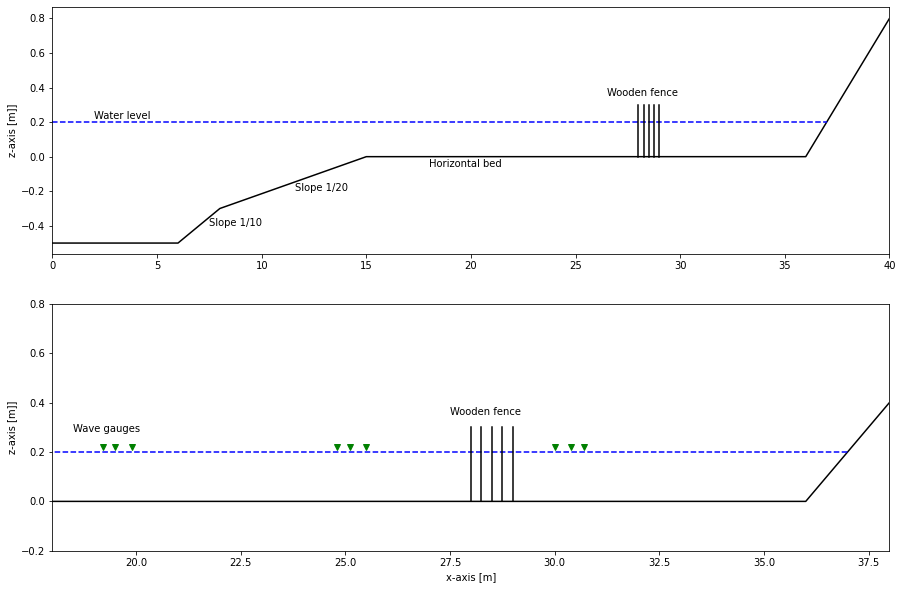

In [6]:
# Horizontal position of wave gauges
x_loc = np.array([19.2, 19.5, 19.9, 24.8, 25.1, 25.5, 30.0, 30.4, 30.7]);
zgauges = np.repeat(0.22,len(x_loc))
# creating profile as followed by Tung Dao thesis
zp = np.array([-0.50, -0.50, -0.30, 0.0, 0.0, 0.80])
xp = np.array([0, 6, 8, 15, 36, 40])
# Wooden fence
xfe = np.array([np.arange(28.0, 29.25, 0.25),
                np.arange(28.0, 29.25, 0.25)])
zfe = np.array([np.zeros(5),
               np.repeat(0.3, 5)])
# ploting profile
plt.figure(figsize = (15, 10))
plt.subplot(2,1,1)
plt.plot(xp,zp,'k-', [0, 37], [0.2, 0.2], 'b--')    # Black line is the profile, and blue dashed-line is the water level
plt.plot(xfe, zfe, 'k')                             # Wooden fences
plt.annotate('Slope 1/10', xy = (7.48, -0.4))
plt.annotate('Slope 1/20', xy = (11.6, -0.2))
plt.annotate('Horizontal bed', xy = (18, -0.06))
plt.annotate('Wooden fence', xy = (26.5, 0.35))
plt.ylabel('z-axis [m]]')
plt.xlim([0, 40])
plt.annotate('Water level', xy = (2, 0.22))
plt.subplot(2,1,2)
plt.plot(xp,zp,'k-',[0, 37],[0.2, 0.2],'b--')
plt.plot(xfe, zfe, 'k')
plt.plot(x_loc,zgauges,'gv')
plt.annotate('Wave gauges', xy = (18.5, 0.28))
plt.annotate('Wooden fence', xy = (27.5, 0.35))
plt.xlabel('x-axis [m]')
plt.ylabel('z-axis [m]]')
plt.xlim([18, 38])
plt.ylim([-0.2, 0.8])

## Loading data
Data is uploaded to Github and can be loaded directly.

Otherwise, data can be downloaded from [Google drive folder](https://drive.google.com/drive/folders/1VycZKT-tFlLSXhkL_K6lFGzBDR-ZRMgO?usp=sharing) and [Surfdrive](https://surfdrive.surf.nl/files/index.php/s/1mabZO7x4eme0Gk).

---

In [7]:
# Loading data after mounting the online drive
# import urllib.request # No need to use this package
# Loading data url
fname_exp_url = 'https://raw.githubusercontent.com/HoangTungDao/Wave-fences-physical-numercial-modelling/c939ab6fe674341cf4ef785c61c64ba4411d471b/Data/Measure_01.txt'
fname_swash_url = 'https://raw.githubusercontent.com/HoangTungDao/Wave-fences-physical-numercial-modelling/c939ab6fe674341cf4ef785c61c64ba4411d471b/Data/Calculate_01.txt'
# Loading data
data_exp = np.loadtxt(fname_exp_url, delimiter = "\t", skiprows = 0)
data_swash = np.loadtxt(fname_swash_url, delimiter = "\t", skiprows = 0)
# Loading constant values
# Start to set serval constant values and call varibles from loaded data. 
g = 9.81                             # gravitational accleration (m/s2)
tstep = 0.01                         # time step
Fs = 1/tstep                         # sampling frequency
d = 0.2                              # water depth
cali = 0.010                         # converting vol to meter
# Experimental data file has 12 columns, first column is time, from 2 to 10 are the measurements
# last two columns are the velocity, no used.
Ts = data_exp[:,0]                   # loading the time recored, time step is 0.01
eta = data_exp[:,1:10]*cali          # loading the surface elevation from data
n = len(eta[1,:])                    # number of measure points
neta = len(eta)                      # length of measurements at 1 column
mduration = (neta-1)*tstep           # measurement duration in seconds
mduration_min = mduration/60         # measurement duration in minutes
# Numerical data with 1 column is the significant wave heights along the profile
# the length of data is 20 m from 19 to 39 m.
Hs_sw = data_swash                   # set Hs
Hs_sw[Hs_sw == -9] = np.nan          # set all value = {-9} to NaN
x_sw = np.linspace(19,39,201)        # create x-axis for Hs_sw

## Question 1

1. What is the meausurment duration?

2. Plot the surface elevation at all locations, at x = 25.5 m, and x = 30.0 m.

---

### Answers

---

In [ ]:
# The measurement duration in second is ... seconds
print('The measurement duration in second is about ' + str(mduration) + str(' seconds'))
# The measurement duration in minutes is ... minutes
mduration_min = np.round(mduration_min, 2)
print('The measurement duration in minutes is about ' + str(mduration_min) + str(' minutes'))

The measurement duration in second is about 999.99 seconds
The measurement duration in minutes is about 16.67 minutes


Text(0.5, 1.0, 'x = 30.0 [m]')

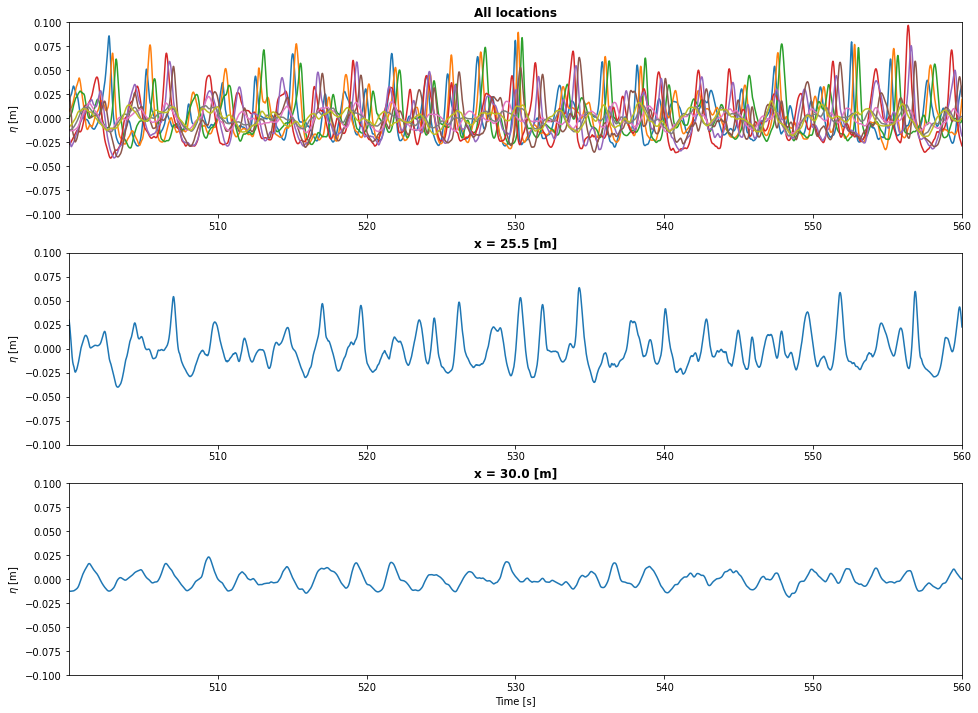

In [ ]:
# plot surface elevation
nTs = 60
# Total 9 wave gauges including 6 in front of and 3 behind the fence
plt.figure(figsize = (16, 12))
# Plotting all wave signals
plt.subplot(3,1,1)
plt.plot(Ts,eta)
plt.xlim([np.mean(Ts), np.mean(Ts+nTs)])
plt.ylim([-0.1, 0.1])
plt.ylabel('$\eta$ [m]')
plt.title('All locations', fontweight = 'bold')
# Plotting wave signals in front of the fence
plt.subplot(3,1,2)
ni = 5
plt.plot(Ts,eta[:,ni])
plt.xlim([np.mean(Ts), np.mean(Ts+nTs)])
plt.ylim([-0.1, 0.1])
plt.ylabel('$\eta$ [m]')
plt.title('x = ' + str(x_loc[ni]) + str(' [m]'), fontweight = 'bold')
# Plotting wave signals behind the fence
plt.subplot(3,1,3)
ni = 6
plt.plot(Ts,eta[:,ni])
plt.xlim([np.mean(Ts), np.mean(Ts+nTs)])
plt.ylim([-0.1, 0.1])
plt.ylabel('$\eta$ [m]')
plt.xlabel('Time [s]')
plt.title('x = ' + str(x_loc[ni]) + str(' [m]'), fontweight = 'bold')

## Question 2

1. What is the maximum value of spectral density at each measurement location?

2. What is the peak wave period at each location?

3. Plot the spectral density at x = 24.8 m, x = 25.5 m, and x = 30.0 m.

4. plot significant wave heights that calculated from experimental data and from the numerical data. 

---

### Functions

The function **Calculation_EHm0Tp** is to calculate wave heights from experiment data or time series data
There are three sub-function inside it, the variance density spectrum, spectral moment, and wavelength calculation

**Input**: time series data, nfft, number of column in data file (n, this parameter is depend on measurement sensors), and the sampling frequency (Fs = 1/dt). 

**Output**: spectral density, frequency, the zeroth order or signinficant wave heights, and wave period (this is to compare to the initial input at wave generator).

---

In [ ]:
# This function is to calculate wave heights from experiment data or time series data
# There are three sub-function inside it, the variance density spectrum, spectral moment, and wavelength calculation
# Input: time series data, nfft, number of column in data file (n, this parameter is depend on measurement sensors), water depth (d), and the sampling frequency (Fs = 1/dt)
# Output: spectral density, frequency, the zeroth order or signinficant wave heights, wave period (this is to compare to the initial input at wave generator), and wavelength.

def Calculation_EHm0Tp(elevation, nfft, n, Fs):
    import numpy as np
    # This function is to calculate Spectral density at all sensor in the measurement
    # Inputs include the measurement (eta), number of sensors (measured points), and water depth
    # Outputs are spectral density, frequency, wave period, wavelength (deep, intermediate and shallow zones)
    E_tot = []                    # creating an array of variable of spectral density
    f_tot = []                    # creating an array of variable of frequency
    fp_tot = []
    Hm0_tot = []
    for i in range(n):
        # for calculating wave spectrum
        eta_i = elevation[:, i]
        temp_e_tot, temp_f_tot, confLow, confUpp = wave_spectrum(eta_i, nfft, Fs)
        # Update E_tot, f_top
        E_tot = np.append(E_tot, temp_e_tot.flatten())
        f_tot = np.append(f_tot, temp_f_tot.flatten())
        f1 = np.min(temp_f_tot)
        f2 = np.max(temp_f_tot)
        max_id = np.argmax(temp_e_tot)                      # finding index of maximum spectral density
        fp_tot = np.append(fp_tot, temp_f_tot[max_id])      # finding frequency corresponding to max E
        # for calculating wave height
        temp_Hm0_tot = 4*np.sqrt(spectral_moment(temp_f_tot, temp_e_tot, f1, f2, 0))
        Hm0_tot = np.append(Hm0_tot, temp_Hm0_tot)           # update Hm0
    # Convert to array
    E_tot = np.asarray(E_tot, dtype=np.float64).reshape(n, -1).T
    f_tot = np.asarray(f_tot, dtype=np.float64).reshape(n, -1).T
    # Other calculations
    Tp_tot = 1.0/fp_tot
    Tp = np.round(np.mean(Tp_tot), 2)
    f = f_tot[:, 0]    
    return E_tot, fp_tot, f, Hm0_tot, Tp, Tp_tot
    
# Functions used in above calculations
def wave_spectrum(data,nfft, Fs):
    """
    ### Variance density spectrum
    Compute variance spectral density spectrum of the time-series and its 90% confidence intervals.
    The time series is first divided into blocks of length $nfft$ before being Fourier-transformed.
    **Input**:
        * data: time series
        * nfft: block length
        * Fs: sampling frequency (Hz)
    **Output**:
        * E: variance spectral density. The data is meter, then $E$ is in $m^2/Hz$.
        * f: frequency axis (Hz)
    """
    # cal libs
    import numpy as np
    import scipy.signal 
    from scipy.fftpack import fft        # importing Fourer transform package
    from scipy.stats import chi2         # importing confidence interval package
    
    # Function for calcualting wave spectrum from time-series data
    n = len(data)                                 # Length of the time-series
    nfft = int(nfft - (nfft%2))                   # Length of window contain even number
    data = scipy.signal.detrend(data)             # Detrend the time-series
    nBlocks = int(n/nfft)                         # Number of blocks
    data_new = data[0:nBlocks*nfft]                # Completed blocks
    # The organization of the initial time-series into blocks of length nfft
    dataBlock = np.reshape(data_new,(nBlocks,nfft)) # Each column of dataBlock is one block

    # Definition frequency axis 
    df = Fs/nfft                                  # Frequency resolution of spectrum df=1/[Duration of 1 block]
    f = np.arange(0,Fs/2+df,df)                   # Frequency axis (Fs/2 = max frequency)
    fId = np.arange(0,len(f))                     # 

      # Calculation of the variance for each block and for each frequency
    fft_data = fft(dataBlock,n = nfft,axis = 1)   # Frourier transform of the data
    fft_data = fft_data[:,fId]                    # Only one side needed
    A = 2.0/nfft*np.real(fft_data)                # A(i,b) & B(i,b) contain the Frourier coefficients
    B = 2.0/nfft*np.imag(fft_data)                # 
    E = (A**2 + B**2)/2                           # E(i,b) = ai^2/2 = variance at frequency Fi for the data
    # Averaging the variance over the blocks, and divide by df to ge the variance
    E = np.mean(E,axis = 0)/df                    # 
    # Confidence intervals
    edf = round(nBlocks*2)                        # Degrees of freedom
    alpha = 0.1                                   # Calulation of the 90% confidence interval

    confLow = edf/chi2.ppf(1-alpha/2,edf)         # 
    confUpp = edf/chi2.ppf(alpha/2,edf)           #

    return E,f,confLow,confUpp

def spectral_moment(f,E,f1,f2,n):
    import numpy as np
    """
    Calculate the n th-order spectral moment for a given frequency band [fmin, fmax].
    Input:
        E: variance density spectrum
        f: frequency axis
        fmin and fmax (f1 & f2): minimum and maximum frequency considered in the moment calculation
        n: order of moment (if n = 0, it is the zeroth order)
    Output:
        mn: spectral moment. This varible is to calculate wave height in the same order of moment
    """
    if n >= 0:
        ind_f = np.where((f >= f1)&(f <= f2))[0]
    # indices of the frequencies larger than fmin and smaller than fmax
    else:
        ind_f = np.where((f >= f1)&(f <= f2)&(f!=0))[0]
        # when n < 0, f cannot be equal to zero as f^(-N) = (1/f)^(N) = infinity if f = 0
    mn = np.trapz(E[ind_f] * f[ind_f]**n,f[ind_f]);
    
    return mn
    
def wavelength(T, d):
    import numpy as np
    """ 
    Wave length calculation based on period (T) and water depth (d)
    """
    # cosntant
    g = 9.81           # gravitational accleration (m/s2)
    # wavelength at deep water
    L0 = (g*T**2)/(2*np.pi)
    guess = L0
    L = (g*T**2)/(2*np.pi)*np.tanh((2*np.pi)*(d/guess))
    diff = abs(L-guess)
    # wavelength at intermediate water depth and shallow water
    while diff > 0.01:
        diff = abs(L-guess)
        guess = L + (0.5*diff)
        L = (g*T**2)/(2*np.pi)*np.tanh((2*np.pi)*(d/guess))
    
    return L0, L


### Calculations

It is needed to run the function "Calculation_EHm0Tp" in order to successfully calculate

---

In [ ]:
# Calculations
nfft = 2000
E_exp, fn_exp, f_exp, Hm0_exp, Tp_exp, Tp_exp_all = Calculation_EHm0Tp(eta, nfft, n, Fs)
L_exp_all = np.zeros(n)
for i in range(n):
  L_exp_all[i], L0_exp = wavelength(Tp_exp_all[i], d)
L0_exp = np.round(L0_exp,2)
L_exp_all = np.round(L_exp_all,2)

### Answers

---

In [ ]:
# Extract maximum value of spectral density of all locations
E_max = np.zeros(n)                                          # create an array of E_max with n columns/rows
max_id = np.zeros(n)                                         # create an array of f_max_index with n columns/rows
Tp_exp_all = np.zeros(n)                                     # create an array of Tp_exp_all with n columns/rows
for i in range(n):
  E_max[i] = np.max(E_exp[:,i])
  E_max = np.round(E_max,5)                                  # update E_max
  Tp_exp_all = np.round(1.0/fn_exp,2)
  # Print out the value of spectral density
  print('The maximum value of spectral density at location ' + str(x_loc[i]) + str(' m is: ') + str(E_max[i]) + str(' m^2/Hz.'))
  # Print out the peak period
  print('The peak wave period at location ' + str(x_loc[i]) + str(' m is: ') + str(Tp_exp_all[i]) + str(' seconds.'))
  # Print out wave length
  print('Wavelength at location ' + str(x_loc[i]) + str(' m is: ') + str(L_exp_all[i]) + str(' m.\n'))

The maximum value of spectral density at location 19.2 m is: 0.00112 m^2/Hz.
The peak wave period at location 19.2 m is: 2.5 seconds.
Wavelength at location 19.2 m is: 9.76 m.

The maximum value of spectral density at location 19.5 m is: 0.00172 m^2/Hz.
The peak wave period at location 19.5 m is: 2.5 seconds.
Wavelength at location 19.5 m is: 9.76 m.

The maximum value of spectral density at location 19.9 m is: 0.00132 m^2/Hz.
The peak wave period at location 19.9 m is: 2.5 seconds.
Wavelength at location 19.9 m is: 9.76 m.

The maximum value of spectral density at location 24.8 m is: 0.00265 m^2/Hz.
The peak wave period at location 24.8 m is: 2.5 seconds.
Wavelength at location 24.8 m is: 9.76 m.

The maximum value of spectral density at location 25.1 m is: 0.00217 m^2/Hz.
The peak wave period at location 25.1 m is: 2.5 seconds.
Wavelength at location 25.1 m is: 9.76 m.

The maximum value of spectral density at location 25.5 m is: 0.00106 m^2/Hz.
The peak wave period at location 25.5 

Text(0.5, 0, 'f [Hz]')

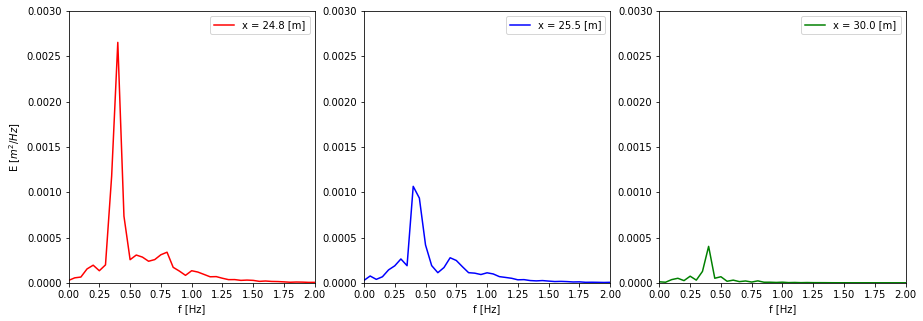

In [ ]:
# Plotting spectral density

plt.figure(figsize= (15, 5))
plt.subplot(1,3,1)
n_loc = 3                                                  # At loction where x_loc = x_loc[3]
plt.plot(f_exp, E_exp[:,n_loc], 'r-')
plt.legend(['x = ' + str(x_loc[n_loc]) + str(' [m]')])
plt.xlim([0, 2])
plt.ylim([0, 0.003])
plt.ylabel('E [$m^2/Hz$]')
plt.xlabel('f [Hz]')
plt.subplot(1,3,2)
n_loc = 5                                                  # At loction where x_loc = x_loc[5]
plt.plot(f_exp, E_exp[:,n_loc], 'b-')
plt.legend(['x = ' + str(x_loc[n_loc]) + str(' [m]')])
plt.xlim([0, 2])
plt.ylim([0, 0.003])
plt.xlabel('f [Hz]')
plt.subplot(1,3,3)
n_loc = 6                                                  # At loction where x_loc = x_loc[6]
plt.plot(f_exp, E_exp[:,n_loc], 'g-')
plt.legend(['x = ' + str(x_loc[n_loc]) + str(' [m]')])
plt.xlim([0, 2])
plt.ylim([0, 0.003])
plt.xlabel('f [Hz]')

Text(2, 0.22, 'Water level')

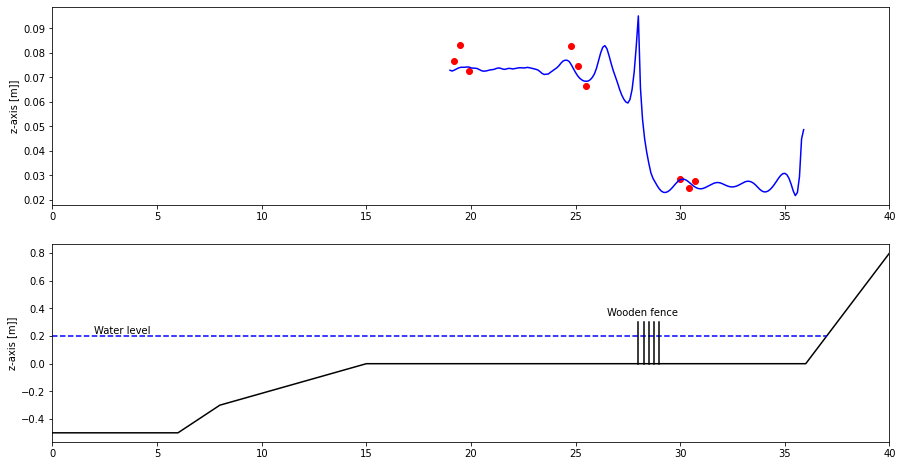

In [ ]:
# Plotting significant wave heights

plt.figure(figsize= (15, 8))

plt.subplot(2,1,1)
plt.plot(x_loc, Hm0_exp, 'or', x_sw, Hs_sw, 'b-')
plt.ylabel('z-axis [m]]')
plt.xlim([0, 40])
plt.subplot(2,1,2)
plt.plot(xp,zp,'k-',[0, 37],[0.2, 0.2],'b--')            # Black line is the profile, and blue dashed-line is the water level
plt.plot(xfe, zfe, 'k')
plt.annotate('Wooden fence', xy = (26.5, 0.35))
plt.ylabel('z-axis [m]]')
plt.xlim([0, 40])
plt.annotate('Water level', xy = (2, 0.22))